In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import download
import nltk
from nltk.corpus import stopwords
!pip install wordcloud
from wordcloud import WordCloud
import json
from nltk.stem import WordNetLemmatizer

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/f5/b0/247159f61c5d5d6647171bef84430b7efad4db504f0229674024f3a4f7f2/wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------------ --------------------------- 92.2/300.2 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 300.2/300.2 kB 2.3 MB/s eta 0:00:00


In [123]:
#loading the json files. 
data = pd.read_csv('./nuclear_from_r_energy_dataset.csv')

#################################################################################
#  Only change this line: Change NEG to POS and run the notebook again to get   #
#  wordcloud for Positive Sentiment                                             #
#################################################################################
data = data[data['label'] == "NEG"]


stop = stopwords.words('english') + ['nuclear', 'energy', "someone", "else", "wind", "solar", "seems", "like", "still", "probably"]

def remove_encoding_word(word):
    word = str(word)
    word = word.encode('ASCII', 'ignore').decode('ASCII')
    return word

def remove_encoding_text(text):
    text = str(text)
    text = ' '.join(remove_encoding_word(word) for word in text.split() if word not in stop)
    return text


In [124]:
#lemmatize the text
data['body'] = data['body'].apply(remove_encoding_text)

In [125]:
text = ' '.join(words for words in data['body'])
len(text)

258019

In [126]:
lemma = WordNetLemmatizer().lemmatize
lemma('leaves')

'leaf'

In [127]:
#fit into the tf-idf model
def tokenize(document):
    tokens = [lemma(w) for w in document.split() if len(w) > 3 and w.isalpha()]
    return tokens

In [129]:
vectorizer = TfidfVectorizer(tokenizer = tokenize, ngram_range = ((2,2)), stop_words = stop, strip_accents = 'unicode')

In [130]:
tdm = vectorizer.fit_transform(data['body'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:408: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['doe'] not in stop_words.
  warnings.warn(


In [131]:
vectorizer.vocabulary_.items()

dict_items([('fucking dead', 6318), ('dead farm', 3740), ('farm nuke', 5765), ('nuke stop', 10778), ('stop bitching', 15523), ('bitching extra', 1567), ('extra future', 5574), ('future generation', 6518), ('generation thank', 6614), ('thank young', 16355), ('young teen', 18640), ('teen carter', 16253), ('carter halt', 2091), ('halt french', 7216), ('french picked', 6281), ('picked left', 11512), ('left little', 8914), ('little le', 9135), ('le half', 8803), ('half life', 7203), ('life largest', 8999), ('largest farm', 8725), ('farm world', 5766), ('world near', 18275), ('near tehachapi', 10431), ('tehachapi rest', 16254), ('rest le', 13929), ('le percent', 8813), ('percent total', 11433), ('total electricity', 16831), ('electricity used', 4790), ('even rightly', 5166), ('rightly mocked', 14029), ('mocked risible', 10109), ('risible gimmick', 14037), ('gimmick mccain', 6747), ('mccain cobbled', 9773), ('cobbled together', 2694), ('together ersatz', 16787), ('ersatz opposition', 5033), (

In [132]:
#finally lets create the wordcloud. 
tfidf_weights = [(word, tdm.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]

In [133]:
tfidf_weights[0:10]

[('fucking dead', 0.18103753425937746),
 ('dead farm', 0.18103753425937746),
 ('farm nuke', 0.18103753425937746),
 ('nuke stop', 0.18103753425937746),
 ('stop bitching', 0.18103753425937746),
 ('bitching extra', 0.18103753425937746),
 ('extra future', 0.18103753425937746),
 ('future generation', 0.18103753425937746),
 ('generation thank', 0.18103753425937746),
 ('thank young', 0.18103753425937746)]

In [134]:
w = WordCloud(width=1500, height=1200, mode='RGBA', background_color='white', max_words=100).fit_words(dict(tfidf_weights))

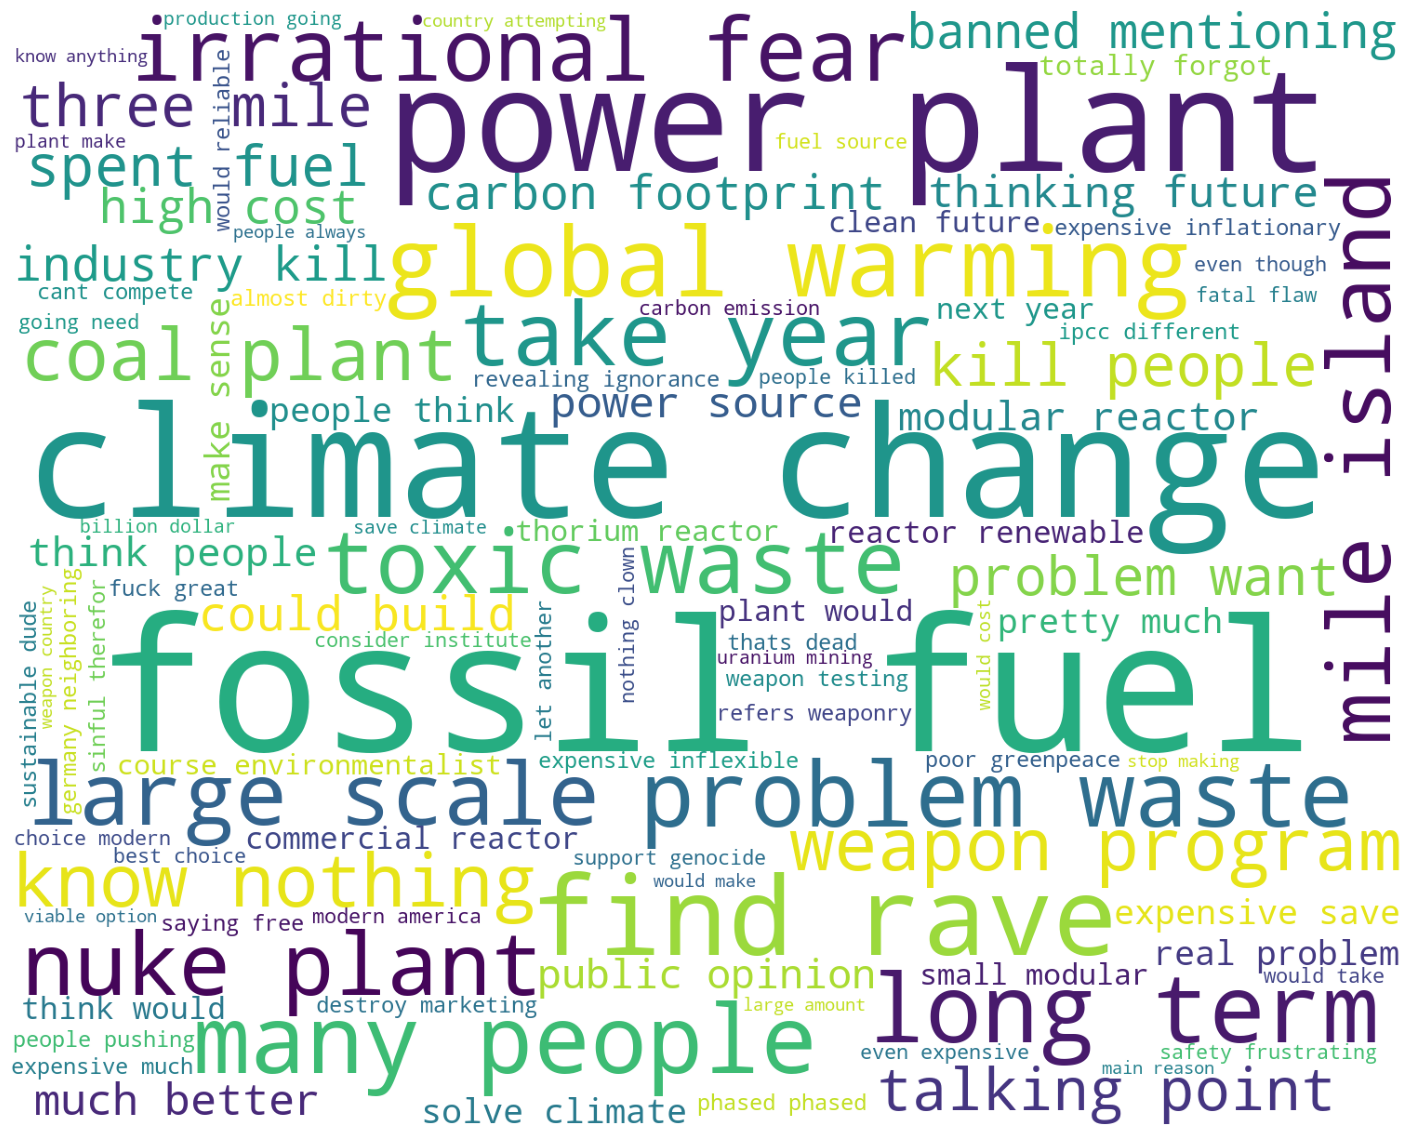

In [135]:
plt.figure(figsize=(18,15))
plt.imshow(w)
plt.axis('off')
plt.savefig('recipes_wordcloud.png')